# Unsupervised Machine Learning- Clustering-2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. Standadizing the data
#### 3. The elbow technique
#### 4. k-means clustering

## 01. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# defing path
path = r'/Users/Ayaz/Desktop/Boat Sales Analysis'

In [4]:
# Importing data.
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_boats_sales.csv'), index_col = False)

In [5]:
# Display all rows without scrolling.
pd.set_option('display.max_rows', None)

In [6]:
df.shape

(9192, 13)

In [7]:
df.head()

,Unnamed: 0,boat_type,manufacturer,type,year_built,length,width,material,views_last_7_days,currency,value,value_in_eur,country
0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,unknown,226,CHF,3337,3337.0,Switzerland
1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490,3490.0,Germany
2,2,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,unknown,64,DKK,25900,3367.0,Denmark
3,3,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399,3399.0,Germany
4,4,Catamaran,unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,CHF,3600,3600.0,Switzerland


### Data Cleaning and Manipulation.

In [8]:
# Drop the specified columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
# Creating subset of numerical variables.
df_sub = df[[ 'year_built', 'length', 'width', 'views_last_7_days', 'value_in_eur']]

In [10]:
df_sub.head()

,year_built,length,width,views_last_7_days,value_in_eur
0,2017,4.00,1.90,226,3337.0
1,2020,4.00,1.50,75,3490.0
2,2020,3.00,1.00,64,3367.0
3,2019,3.55,1.46,58,3399.0
4,1999,6.20,2.38,474,3600.0


In [11]:
# Checking for missing values in subset
value = df_sub.isnull().values.any()
value

False

## 02. Standardize Data

In [13]:
# standazing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_sub)
print(standardized_data)

[[ 0.73530721 -1.28970252 -1.29459456  0.52451058 -0.31984461]
 [ 0.91823515 -1.28970252 -1.59999148 -0.48763277 -0.31968065]
 [ 0.91823515 -1.45635706 -1.98173763 -0.56136506 -0.31981246]
 ...
 [ 0.91823515 -1.2230407  -1.37094379  1.3824864  -0.31859937]
 [ 0.79628319 -1.22804034 -1.30222948  0.79262803 -0.31881262]
 [ 0.85725917 -1.35636434 -1.52364225  0.31001663 -0.31936988]]


In [14]:
# Coverting to dataframe
df_sub = pd.DataFrame(standardized_data, columns=df_sub.columns)
print(df_sub)

      year_built     length      width  views_last_7_days  value_in_eur
0       0.735307  -1.289703  -1.294595           0.524511     -0.319845
1       0.918235  -1.289703  -1.599991          -0.487633     -0.319681
2       0.918235  -1.456357  -1.981738          -0.561365     -0.319812
3       0.857259  -1.364697  -1.630531          -0.601583     -0.319778
4      -0.362260  -0.923063  -0.928118           2.186839     -0.319563
5       0.857259  -1.349698  -1.699245          -0.688721     -0.319849
6       0.796283  -1.231373  -1.424388           0.216176     -0.319884
7      -1.093972  -1.231373  -1.409118           0.611649     -0.319670
8      -0.057381  -1.173044  -1.218245          -0.527850     -0.319670
9       0.918235  -1.223041  -1.485468          -0.232921     -0.318491
10     -0.484212  -1.336366  -1.729785           1.777960     -0.318598
11     -1.215924  -1.289703  -1.981738          -0.159189     -0.319241
12     -1.459828  -0.623084  -0.576912           0.785925     -0

## 03. The Elbow Technique

In [15]:
# Defines the range of potential clusters in the data.
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters = i) for i in num_cl] 

In [16]:
# Creates a score that represents 
# a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))] 


score

/Users/Ayaz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Ayaz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Ayaz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Ayaz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

[-45960.0,
 -34610.65118543814,
 -28534.241391182408,
 -23627.489011366873,
 -20035.62490456931,
 -17240.629564771312,
 -15039.316899385532,
 -13527.867011525519,
 -12224.571814967749]

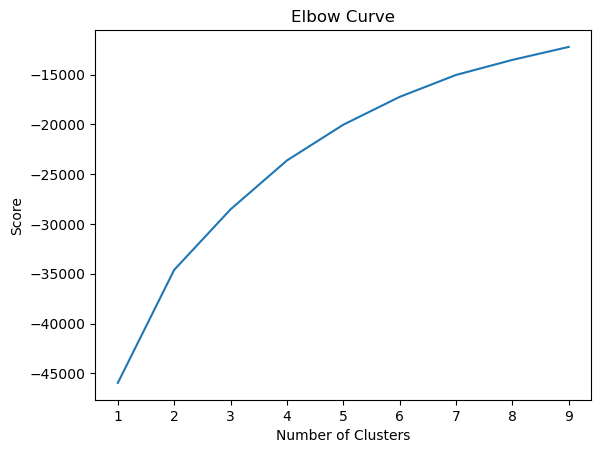

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The curve's breaking point is number three, which climbs sharply from one to two and then from two to three on the x-axis before rising only slightly after three. The optimal count for the number of clusters is three.

## 4. k-means Clustering

In [18]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [19]:
# Fit the k-means object to the data.

kmeans.fit(df_sub)

/Users/Ayaz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [20]:
df_sub['clusters'] =kmeans.fit_predict(df_sub)

/Users/Ayaz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [21]:
df_sub.head()

,year_built,length,width,views_last_7_days,value_in_eur,clusters
0,0.735307,-1.289703,-1.294595,0.524511,-0.319845,0
1,0.918235,-1.289703,-1.599991,-0.487633,-0.319681,0
2,0.918235,-1.456357,-1.981738,-0.561365,-0.319812,0
3,0.857259,-1.364697,-1.630531,-0.601583,-0.319778,0
4,-0.362260,-0.923063,-0.928118,2.186839,-0.319563,0


In [22]:
df_sub['clusters'].value_counts()

0    5529
2    3549
1     114
Name: clusters, dtype: int64

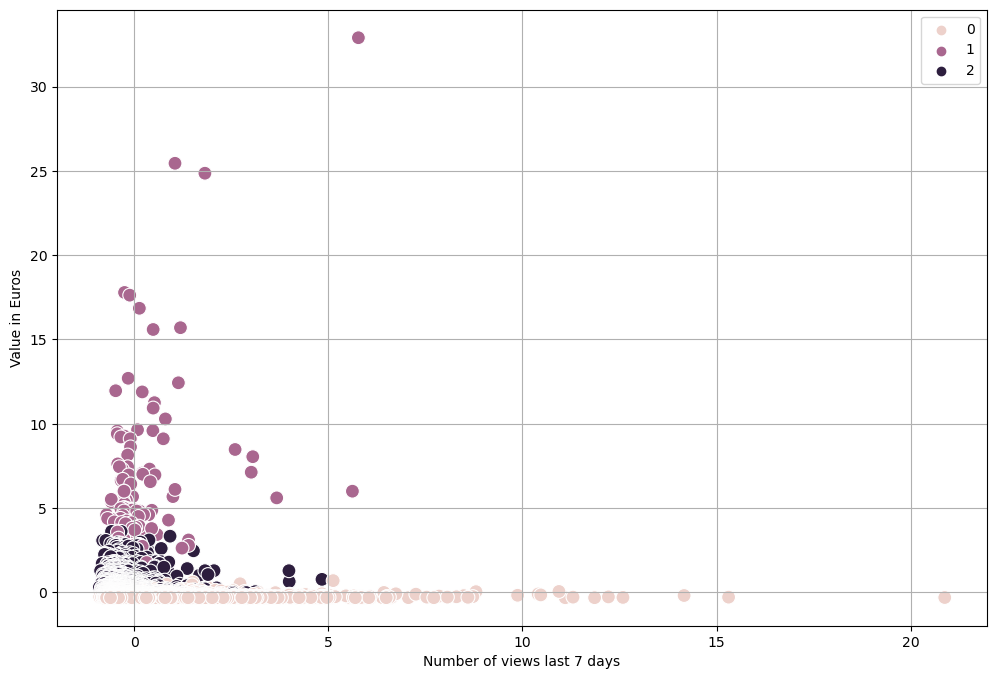

In [23]:
#Plot for the Number of Views and Price of the boat

plt.figure(figsize=(12,8))
Scatter_1 = sns.scatterplot(x = df_sub['views_last_7_days'], y = df_sub['value_in_eur'], hue = kmeans.labels_, s=100)

Scatter_1.grid(True)
plt.xlabel('Number of views last 7 days')
plt.ylabel('Value in Euros')
plt.show()

With the exception of certain extreme values at the top and bottom, the graph above reveals that all of the clusters more or less congregate at the same position. The black cluster indicates that lower-priced boats receive more views, and the most views with all clusters combined indicate that low-cost boats receive the greatest visibility, or, in other words, that low-cost boats attract the most visitors to the website.

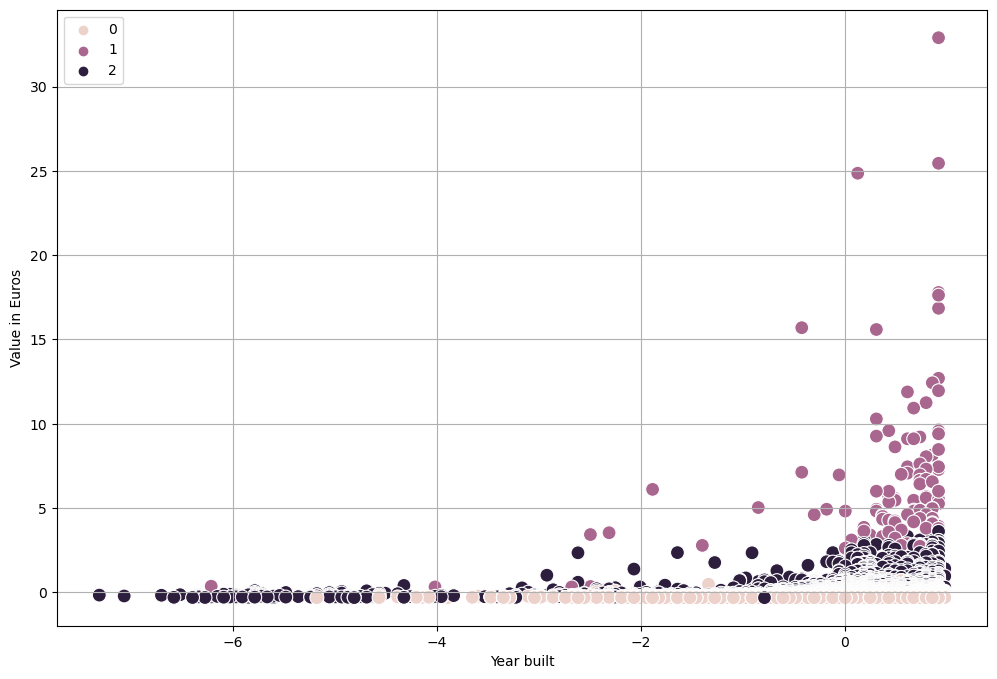

In [24]:
#Plot for the Year built with Price of boat

plt.figure(figsize=(12,8))
Scatter_2 = sns.scatterplot(x = df_sub['year_built'], y = df_sub['value_in_eur'], hue = kmeans.labels_, s=100)

Scatter_2.grid(True)
plt.xlabel('Year built')
plt.ylabel('Value in Euros')
plt.show()

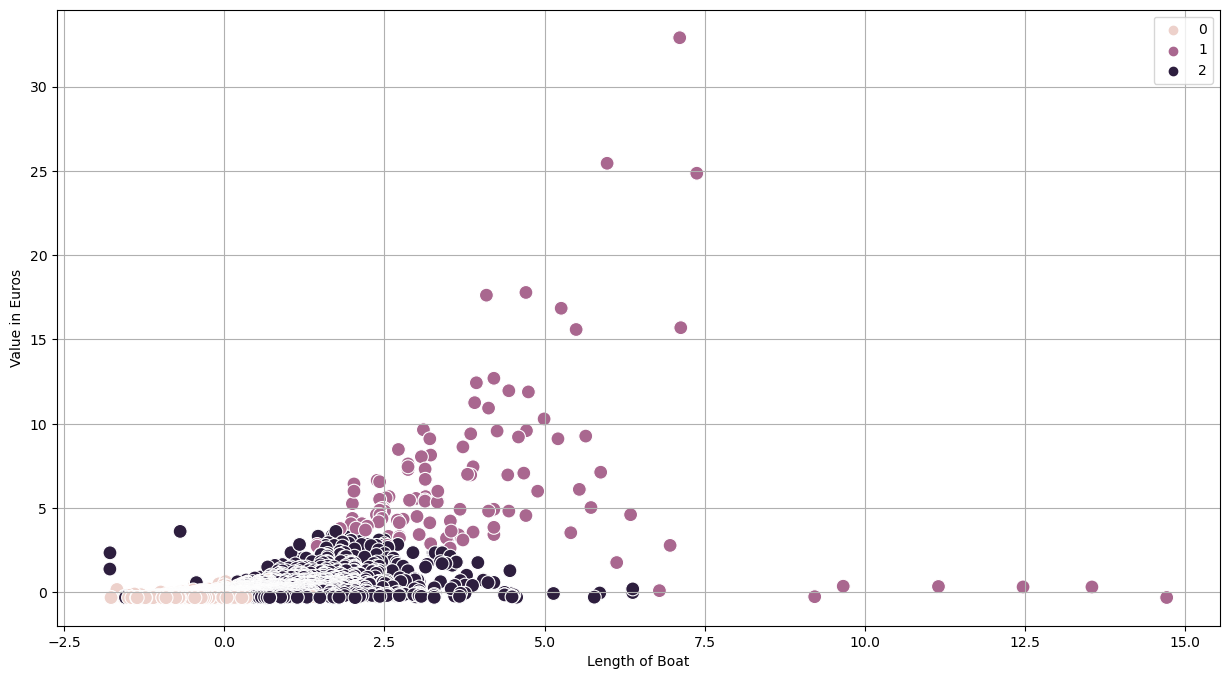

In [25]:
#Plot for the Length of the boat with Price of boat

plt.figure(figsize=(15,8))
Scatter_3 = sns.scatterplot(x = df_sub['length'], y = df_sub['value_in_eur'], hue = kmeans.labels_, s=100)

Scatter_3.grid(True)
plt.xlabel('Length of Boat')
plt.ylabel('Value in Euros')
plt.show()

The two scatterplots above do not completely make sense or provide much insight into the link between boat cost vs. year constructed, either in terms of length. This implies that there are additional crucial criteria that are all-inclusive and would all be drivers of the boat price.

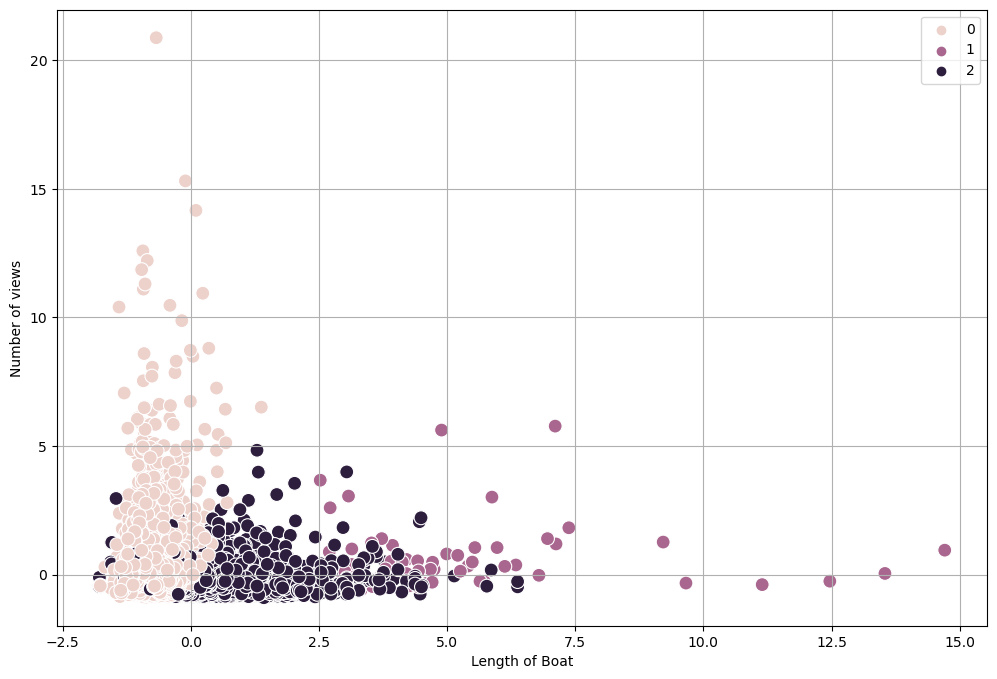

In [26]:
#Plot for the Length of the boat with Number of Views of boat

plt.figure(figsize=(12,8))
Scatter_4 = sns.scatterplot(x = df_sub['length'], y = df_sub['views_last_7_days'], hue = kmeans.labels_, s=100)

Scatter_4.grid(True)
plt.xlabel('Length of Boat')
plt.ylabel('Number of views')
plt.show()

We can see that in the scatterplot above, all of the clusters converge at the same point. It can be observed that the most views across all clusters show that small boats receive the highest amount of attention.

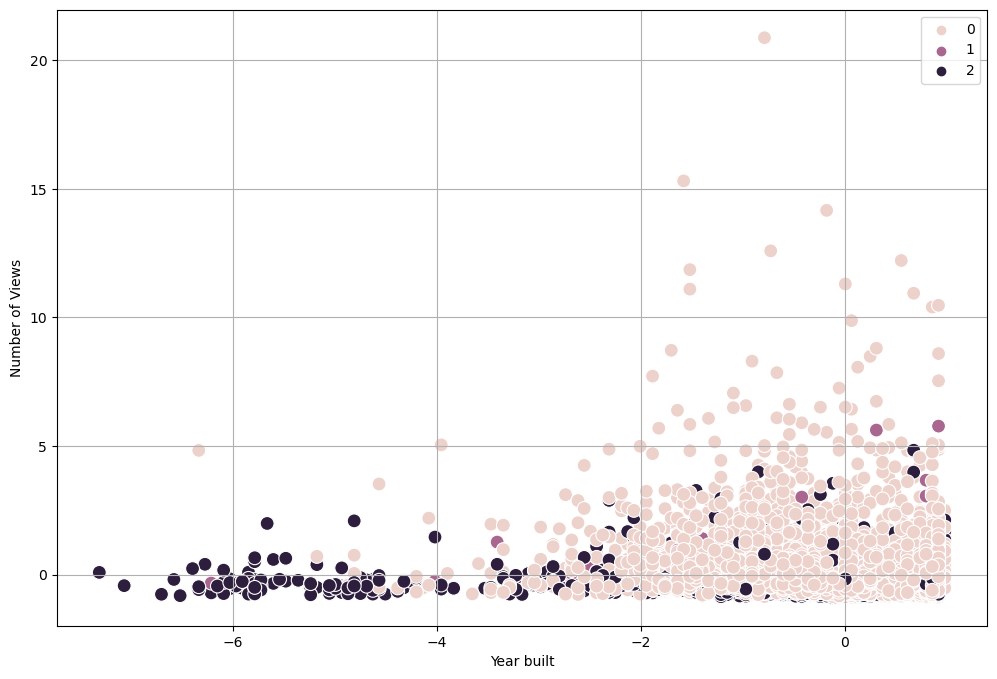

In [27]:
#Plot for the Year Built with Number of Views of boat

plt.figure(figsize=(12,8))
Scatter_5 = sns.scatterplot(x = df_sub['year_built'], y = df_sub['views_last_7_days'], hue = kmeans.labels_, s=100)

Scatter_5.grid(True)
plt.xlabel('Year built')
plt.ylabel('Number of Views')
plt.show()

We can observe the relationship between the cluster pink (coded as '0' in the legend), which reflects the number of views, and the newly built boats contains some extreme points, The dark cluster '2' on the legend shows that they both contain the spots with the most views and newly built boats, and they both demonstrate some linear relationship between these variables

### Descriptive statistics

In [28]:
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark purple'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'pink'

In [29]:
# Use groupby() function to calculate descriptive statistics of clusters.
df_sub.groupby('cluster').agg({'year_built':['mean', 'median'], 
                         'length':['mean', 'median'], 
                         'views_last_7_days':['mean', 'median'],
                          'value_in_eur':['mean', 'median']})

year_built              length           views_last_7_days  \
                  mean    median      mean    median              mean   
cluster                                                                  
dark purple  -0.219485  0.064571  0.758970  0.540164         -0.314862   
pink          0.135363  0.369451 -0.570886 -0.606419          0.197054   
purple        0.267825  0.613355  4.060010  3.402456          0.245045   

                      value_in_eur            
               median         mean    median  
cluster                                       
dark purple -0.420603     0.160165 -0.028719  
pink        -0.125674    -0.236912 -0.264480  
purple      -0.095511     6.504048  5.144017

The cluster pink (Marked as '0' in the legend), which reflects some connection between  'views last 7 days'  and the 'year built' variables. The pink cluster '0' contains some extreme points, and dark cluster '2' on the legend also show that they both contain the spots with the most views and newly built boats, and they both demonstrate some linear relationship between these variables. A dark purple cluster also indicates the relationship between 'value in eur'  and 'views last 7 days' variables. All other clusters also suggest that on the plot.

The 'Year built' and 'value in eur' variables do not completely make sense or provide much insight into the link between boat cost and the year constructed; either with the  'length' and 'Year built's variables, this implies that there are additional crucial criteria that are all-inclusive and would all be drivers of the boat price.

In conclusion, we can say that there is some relationship between the length, the price of the boat, and the views. These relationships can be further explored.

### Export Data and Visualizations

In [30]:
Scatter_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '2-Price_vs_Views.png'))
Scatter_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '2-Price_vs_Age.png'))
Scatter_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '2-Length_vs_Price.png'))
Scatter_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '2-Length_vs_Views.png'))
Scatter_5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '2-Age_vs_Views.png'))

In [31]:
# Export dataframe as csv file.
df_sub.to_csv(os.path.join(path, '02 Data','Prepared Data', 'Clusters.csv'))